# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

#To display Matplotlib plots directly in the output cells of the notebook without the need to call plt.show()
%matplotlib inline
# pd.options.display.float_format = '{:.5f}'.format

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
train = pd.read_csv('/content/drive/MyDrive/Colabs Notebook/DSN-AI-Bootcamp-2023-Qualification-Hackathon/Housing_dataset_train.csv')

test = pd.read_csv('/content/drive/MyDrive/Colabs Notebook/DSN-AI-Bootcamp-2023-Qualification-Hackathon/Housing_dataset_test.csv')

sub = pd.read_csv('/content/drive/MyDrive/Colabs Notebook/DSN-AI-Bootcamp-2023-Qualification-Hackathon/Sample_submission.csv')

In [ ]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
test.shape

(6000, 6)

In [ ]:
train.shape

(14000, 7)

## Exploratory Data Analysis

In [ ]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [ ]:
test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

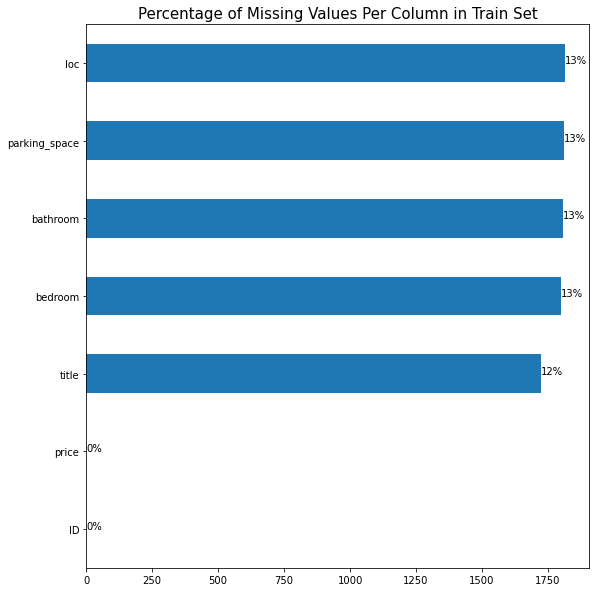

In [ ]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage,(x,y))

In [ ]:
train['loc'].value_counts()

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: loc, dtype: int64

In [ ]:
len(train['loc'].value_counts())

36

## df Visualization

In [ ]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.00000,2.00000,1.00000,1149999.56500
1,2748,Ondo,Apartment,NaN,2.00000,4.00000,1672416.68900
2,9261,Ekiti,NaN,7.00000,5.00000,NaN,3364799.81400
3,2224,Anambra,Detached duplex,5.00000,2.00000,4.00000,2410306.75600
4,10300,Kogi,Terrace duplex,NaN,5.00000,6.00000,2600700.89800


In [ ]:
# Count of each unique House Title

train['title'].value_counts(ascending = False)

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

- Most of the houses are `Flat`
- Just very few of the houses are  `Cottage`

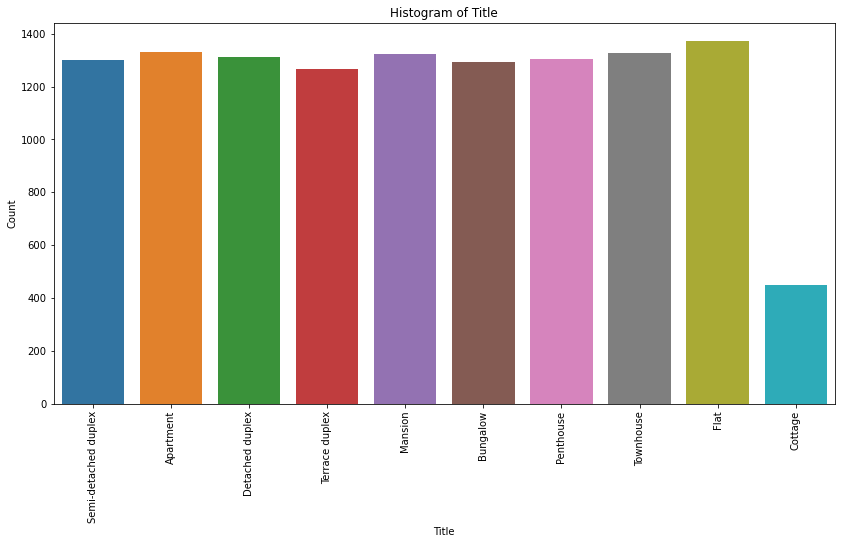

In [ ]:
# Histogram of Title
plt.figure(figsize = (14, 7))
sns.countplot(x = 'title', df = train)
plt.title('Histogram of House Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Average Price of each house title

Title_mean_price = train.groupby(['title'])['price'].mean()

Title_mean_price

title
Apartment              1567003.66666
Bungalow               1733845.14761
Cottage                1307817.28528
Detached duplex        2205882.99880
Flat                   1721875.46344
Mansion                3725768.36179
Penthouse              2628945.17705
Semi-detached duplex   1918467.57136
Terrace duplex         1927269.65370
Townhouse              2056125.04742
Name: price, dtype: float64

In [ ]:
Title_mean_price.index

Index(['Apartment', 'Bungalow', 'Cottage', 'Detached duplex', 'Flat',
       'Mansion', 'Penthouse', 'Semi-detached duplex', 'Terrace duplex',
       'Townhouse'],
      dtype='object', name='title')

In [ ]:
Title_mean_price.values

array([1567003.66666033, 1733845.147614  , 1307817.285284  ,
       2205882.99880473, 1721875.46343805, 3725768.36179289,
       2628945.1770549 , 1918467.57135781, 1927269.65369929,
       2056125.04741891])

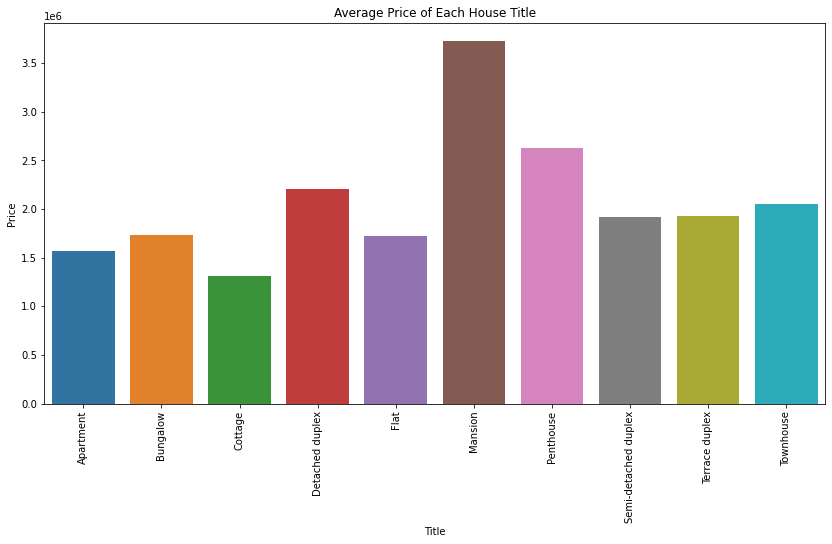

In [ ]:
# What is the average price for each House title?

plt.figure(figsize = (14, 7))
sns.barplot(Title_mean_price.index, Title_mean_price.values)
plt.title('Average Price of Each House Title')
plt.xlabel('Title')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

- On average, it is observed that `Mansion` is the most expensive House Type

- And `Cottage` is the least expensive

In [ ]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.00000,2.00000,1.00000,1149999.56500
1,2748,Ondo,Apartment,NaN,2.00000,4.00000,1672416.68900
2,9261,Ekiti,NaN,7.00000,5.00000,NaN,3364799.81400
3,2224,Anambra,Detached duplex,5.00000,2.00000,4.00000,2410306.75600
4,10300,Kogi,Terrace duplex,NaN,5.00000,6.00000,2600700.89800


In [ ]:
# What state has the highest number of houses?

train['loc'].value_counts()

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Name: loc, dtype: int64

In [ ]:
# What is the average house price in each state

train.groupby('loc')['price'].mean()

loc
Abia          1717083.36160
Adamawa       1905286.95661
Akwa Ibom     2725454.33341
Anambra       2337230.07168
Bauchi        1772960.72868
Bayelsa       3112321.66834
Benue         1920460.82697
Borno         1735703.59172
Cross River   2507765.01272
Delta         2712493.15171
Ebonyi        1635849.63746
Edo           2310451.76997
Ekiti         2109220.25028
Enugu         2272886.72249
Gombe         1860851.42076
Imo           2067489.40577
Jigawa        1735867.35795
Kaduna        1846993.46892
Kano          2081930.99988
Katsina       1947589.32547
Kebbi         1616371.56034
Kogi          1763415.89906
Kwara         1903423.94700
Lagos         4210546.33879
Nasarawa      2061764.18937
Niger         1885325.42238
Ogun          2564020.37689
Ondo          2277494.18507
Osun          2180569.60805
Oyo           2293159.41819
Plateau       1942315.81927
Rivers        2957097.57463
Sokoto        1681016.35053
Taraba        1855305.76050
Yobe          1747938.01575
Zamfara       16

In [ ]:

avg_price_loc = train.groupby('loc')['price'].mean()

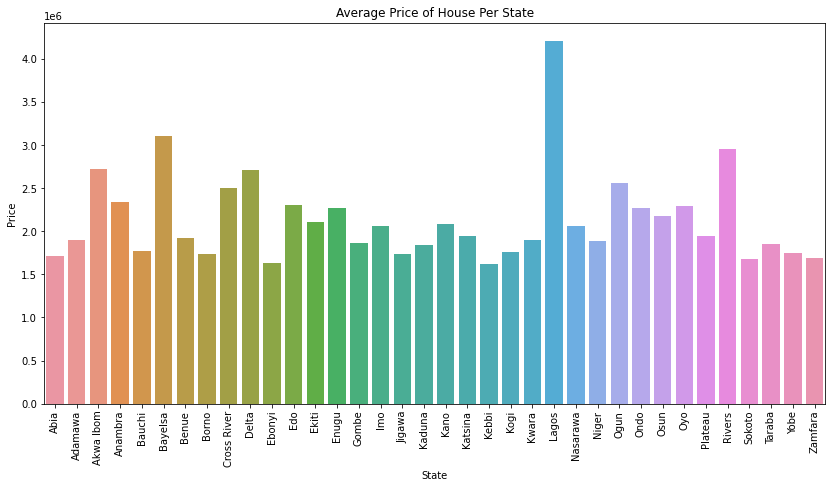

In [ ]:
plt.figure(figsize = (14, 7))
sns.barplot(avg_price_loc.index, avg_price_loc.values)
plt.title('Average Price of House Per State')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Top Ten State with the most expensive House

avg_price_loc_top = train.groupby('loc')['price'].mean().head(10)

In [ ]:
avg_price_loc_top

loc
Abia          1717083.36160
Adamawa       1905286.95661
Akwa Ibom     2725454.33341
Anambra       2337230.07168
Bauchi        1772960.72868
Bayelsa       3112321.66834
Benue         1920460.82697
Borno         1735703.59172
Cross River   2507765.01272
Delta         2712493.15171
Name: price, dtype: float64

In [ ]:
train.groupby('loc')['price'].mean()

loc
Abia          1717083.36160
Adamawa       1905286.95661
Akwa Ibom     2725454.33341
Anambra       2337230.07168
Bauchi        1772960.72868
Bayelsa       3112321.66834
Benue         1920460.82697
Borno         1735703.59172
Cross River   2507765.01272
Delta         2712493.15171
Ebonyi        1635849.63746
Edo           2310451.76997
Ekiti         2109220.25028
Enugu         2272886.72249
Gombe         1860851.42076
Imo           2067489.40577
Jigawa        1735867.35795
Kaduna        1846993.46892
Kano          2081930.99988
Katsina       1947589.32547
Kebbi         1616371.56034
Kogi          1763415.89906
Kwara         1903423.94700
Lagos         4210546.33879
Nasarawa      2061764.18937
Niger         1885325.42238
Ogun          2564020.37689
Ondo          2277494.18507
Osun          2180569.60805
Oyo           2293159.41819
Plateau       1942315.81927
Rivers        2957097.57463
Sokoto        1681016.35053
Taraba        1855305.76050
Yobe          1747938.01575
Zamfara       16

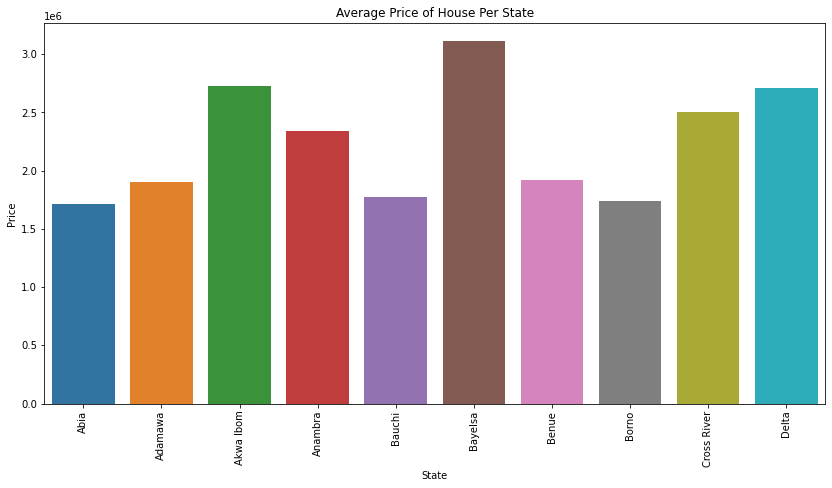

In [ ]:
plt.figure(figsize = (14, 7))
sns.barplot(avg_price_loc_top.index, avg_price_loc_top.values)
plt.title('Average Price of House Per State')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
train.groupby(['loc', 'title'])['price'].mean()

# The Idea of Plotting a Graph and seeing the Variation of the House Price per House Type in Each State.

loc      title               
Abia     Apartment              1307904.27928
         Bungalow               1380415.81201
         Cottage                 924151.90512
         Detached duplex        1767214.01826
         Flat                   1530552.13427
                                     ...     
Zamfara  Mansion                2761523.74872
         Penthouse              1940599.51108
         Semi-detached duplex   1479472.10771
         Terrace duplex         1588151.88746
         Townhouse              1511642.20234
Name: price, Length: 360, dtype: float64

## df Preprocessing

In [ ]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [ ]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


### Duplicate dfset for extra scrutiny!

In [72]:
train_df = train.copy()
test_df = test.copy()

In [5]:
train_df.shape, test_df.shape

((14000, 7), (6000, 6))

In [ ]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


## Bedroom

In [ ]:
train_df['bedroom'].describe()

count    12201.000000
mean         4.308171
std          2.441165
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: bedroom, dtype: float64

In [ ]:
train_df['bedroom'].value_counts()

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

In [ ]:
train_df['bedroom'].isnull().sum()

1799

In [ ]:
train_df['bedroom'].mean()

4.308171461355626

In [ ]:
# Filling Null Values with Mean
train_df['bedroom'].fillna(train_df['bedroom'].mean(), inplace = True)
test_df['bedroom'].fillna(test_df['bedroom'].mean(), inplace = True)

In [ ]:
train_df['bedroom'].describe()

count    14000.000000
mean         4.308171
std          2.278917
min          1.000000
25%          3.000000
50%          4.308171
75%          6.000000
max          9.000000
Name: bedroom, dtype: float64

## Bathroom

In [ ]:
train_df['bathroom'].value_counts()

1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: bathroom, dtype: int64

In [ ]:
train_df['bathroom'].describe()

count    12195.000000
mean         3.134235
std          2.035950
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          7.000000
Name: bathroom, dtype: float64

In [ ]:
train_df['bathroom'].mean()

3.1342353423534237

In [ ]:
# Filling Null Values

train_df['bathroom'].fillna(train_df['bathroom'].mean(), inplace = True)

test_df['bathroom'].fillna(test_df['bathroom'].mean(), inplace = True)

In [ ]:
train_df['bathroom'].describe()

count    14000.000000
mean         3.134235
std          1.900167
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: bathroom, dtype: float64

## Parking_space

In [ ]:
train_df['parking_space'].value_counts()

4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: parking_space, dtype: int64

In [ ]:
train_df['parking_space'].describe()

count    12189.000000
mean         3.169825
std          1.599415
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: parking_space, dtype: float64

In [ ]:
# Finding the mean of the Parking Space

train_df['parking_space'].mean()

3.169825252276643

In [ ]:
#Filling the Null values with the Mean of the Train and Test Data

train_df['parking_space'].fillna(train_df['parking_space'].mean, inplace = True)
test_df['parking_space'].fillna(test_df['parking_space'].mean(), inplace = True)

In [ ]:
train_df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom             0
bathroom            0
parking_space       0
price               0
dtype: int64

## loc

In [ ]:
train['loc'].value_counts(ascending = False).head(15)

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Name: loc, dtype: int64

In [ ]:
train['loc'].isnull().sum()

1813

## title - `House Type`

In [ ]:
train_df['title'].value_counts()

7.0     1372
9.0     1331
3.0     1327
10.0    1322
5.0     1312
8.0     1306
6.0     1299
2.0     1293
4.0     1266
1.0      450
Name: title, dtype: int64

In [ ]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,6.0,2.0,2.0,1.0,1149999.565
1,2748,Ondo,9.0,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,5.0,5.0,2.0,4.0,2410306.756
4,10300,Kogi,4.0,NaN,5.0,6.0,2600700.898


In [ ]:
#Filling the Null values with the Mean of the Train and Test Data

#train_df['parking_space'].fillna(train_df['parking_space'].mean, inplace = True)
#test_df['parking_space'].fillna(test_df['parking_space'].mean(), inplace = True)

## Feature Engineering

*Join the train and test dataset together for easy access during feature engineering*

In [73]:
df = train_df.drop("price", axis=1).append(test_df)

In [74]:
df.shape

(20000, 6)

In [75]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0


In [76]:
# Define the ranking based on size (arranged from smallest to biggest)
# This makes the Algorithm think that the column is an ordinal feature

house_type_ranks = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
df['title'] = df['title'].map(house_type_ranks)

# Print the updated dataframe
df.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,6.0,2.0,2.0,1.0
1,2748,Ondo,9.0,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,5.0,5.0,2.0,4.0
4,10300,Kogi,4.0,NaN,5.0,6.0


In [77]:
# Define the mapping of states to regions in a dictionary
state_to_region = {
    'Jigawa': 'North-West',
    'Kaduna': 'North-West',
    'Kano': 'North-West',
    'Katsina': 'North-West',
    'Kebbi': 'North-West',
    'Sokoto': 'North-West',
    'Zamfara': 'North-West',
    'Adamawa': 'North-East',
    'Bauchi': 'North-East',
    'Borno': 'North-East',
    'Gombe': 'North-East',
    'Taraba': 'North-East',
    'Yobe': 'North-East',
    'Benue': 'North-Central',
    'Kogi': 'North-Central',
    'Kwara': 'North-Central',
    'Nasarawa': 'North-Central',
    'Niger': 'North-Central',
    'Plateau': 'North-Central',
    'Ekiti': 'South-West',
    'Lagos': 'South-West',
    'Ogun': 'South-West',
    'Ondo': 'South-West',
    'Osun': 'South-West',
    'Oyo': 'South-West',
    'Abia': 'South-East',
    'Anambra': 'South-East',
    'Ebonyi': 'South-East',
    'Enugu': 'South-East',
    'Imo': 'South-East',
    'Akwa Ibom': 'South-South',
    'Bayelsa': 'South-South',
    'Cross River': 'South-South',
    'Delta': 'South-South',
    'Edo': 'South-South',
    'Rivers': 'South-South',
}

In [78]:
df['loc_regions'] = df['loc'].map(state_to_region)

In [79]:
df['loc_regions'].value_counts()

North-West       3587
South-West       3079
North-East       3067
North-Central    3025
South-South      2923
South-East       2506
Name: loc_regions, dtype: int64

In [69]:
df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space',
       'loc_regions'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
df['loc_regions'] = le.fit_transform(df['loc_regions'])
df['loc_regions'].head()

0    2
1    5
2    5
3    3
4    0
Name: loc_regions, dtype: int64

In [81]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = df['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
df['loc'] = df['loc'].map(loc_frequency_mapping)

# Print the updated dfframe
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,loc_regions
0,3583,0.028592,6.0,2.0,2.0,1.0,2
1,2748,0.028097,9.0,NaN,2.0,4.0,5
2,9261,0.027822,NaN,7.0,5.0,NaN,5
3,2224,0.029856,5.0,5.0,2.0,4.0,3
4,10300,0.027382,4.0,NaN,5.0,6.0,0


In [ ]:
train_df.shape[0]

14000

In [ ]:
df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space'], dtype='object')

  ## `bathroom_bedroom_ratio`

In [82]:
df['btrm_bdrm'] = df['bathroom']/df['bedroom']

df['btrm_bdrm'].head()

0    1.000000
1         NaN
2    0.714286
3    0.400000
4         NaN
Name: btrm_bdrm, dtype: float64

## Preparing the Data for Modelling

In [83]:
X = df[:train_df.shape[0]]
y = train_df.price
test_df = df[train_df.shape[0]:]

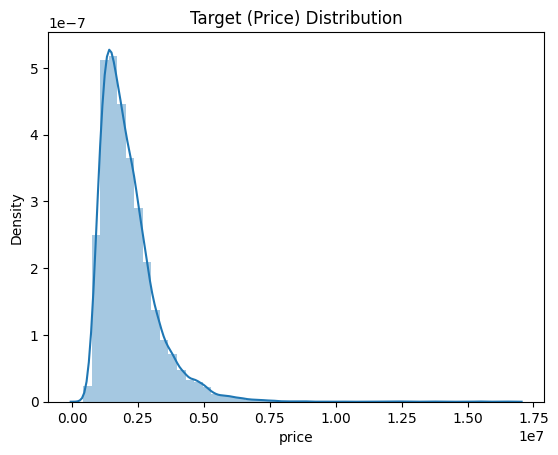

In [10]:
sns.distplot(y)
plt.title("Target (Price) Distribution")
plt.show()

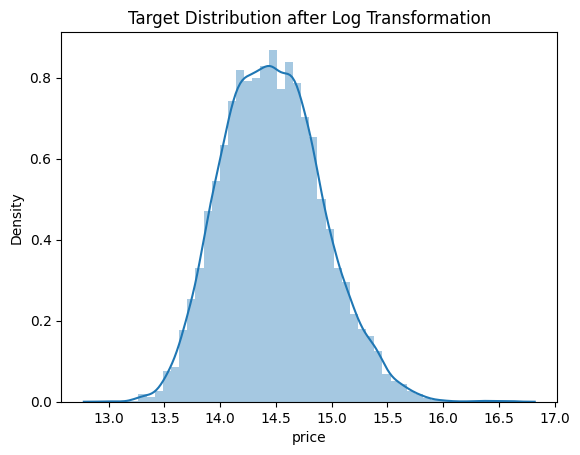

In [13]:
y_transformed = pd.Series(np.log1p(y))
plt.title("Target (Price) Distribution after Log Transformation")
sns.distplot(y_transformed)
plt.show()

In [14]:
!pip install lightgbm
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## Building the Model

### LightGBMRegressor

In [20]:
fold_pred=[]
oof_pred = []

params = {
    'n_estimators': 1000,
    'colsample_bytree': 0.86,
    'learning_rate': 0.032,
    'max_depth': 7,
    'subsample': 0.85}


fold = KFold(n_splits = 10, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train), (X_test, y_test)], early_stopping_rounds = 100, verbose = False)

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test, np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test, np.expm1(preds), squared=False))
    p2 = model.predict(test_df[X.columns])
    fold_pred.append(np.expm1(p2))


print(np.mean(oof_pred))

err:  583972.6420163147
err:  460195.09538353165
err:  523194.9515062927
err:  556308.8658171
err:  658398.8934383639
err:  649631.0570634478
err:  518539.7390878836
err:  526671.0226660868
err:  560612.2942353106
err:  516210.8251491627
555373.5386363494


Text(0.5, 1.0, 'LightGBM features importance:')

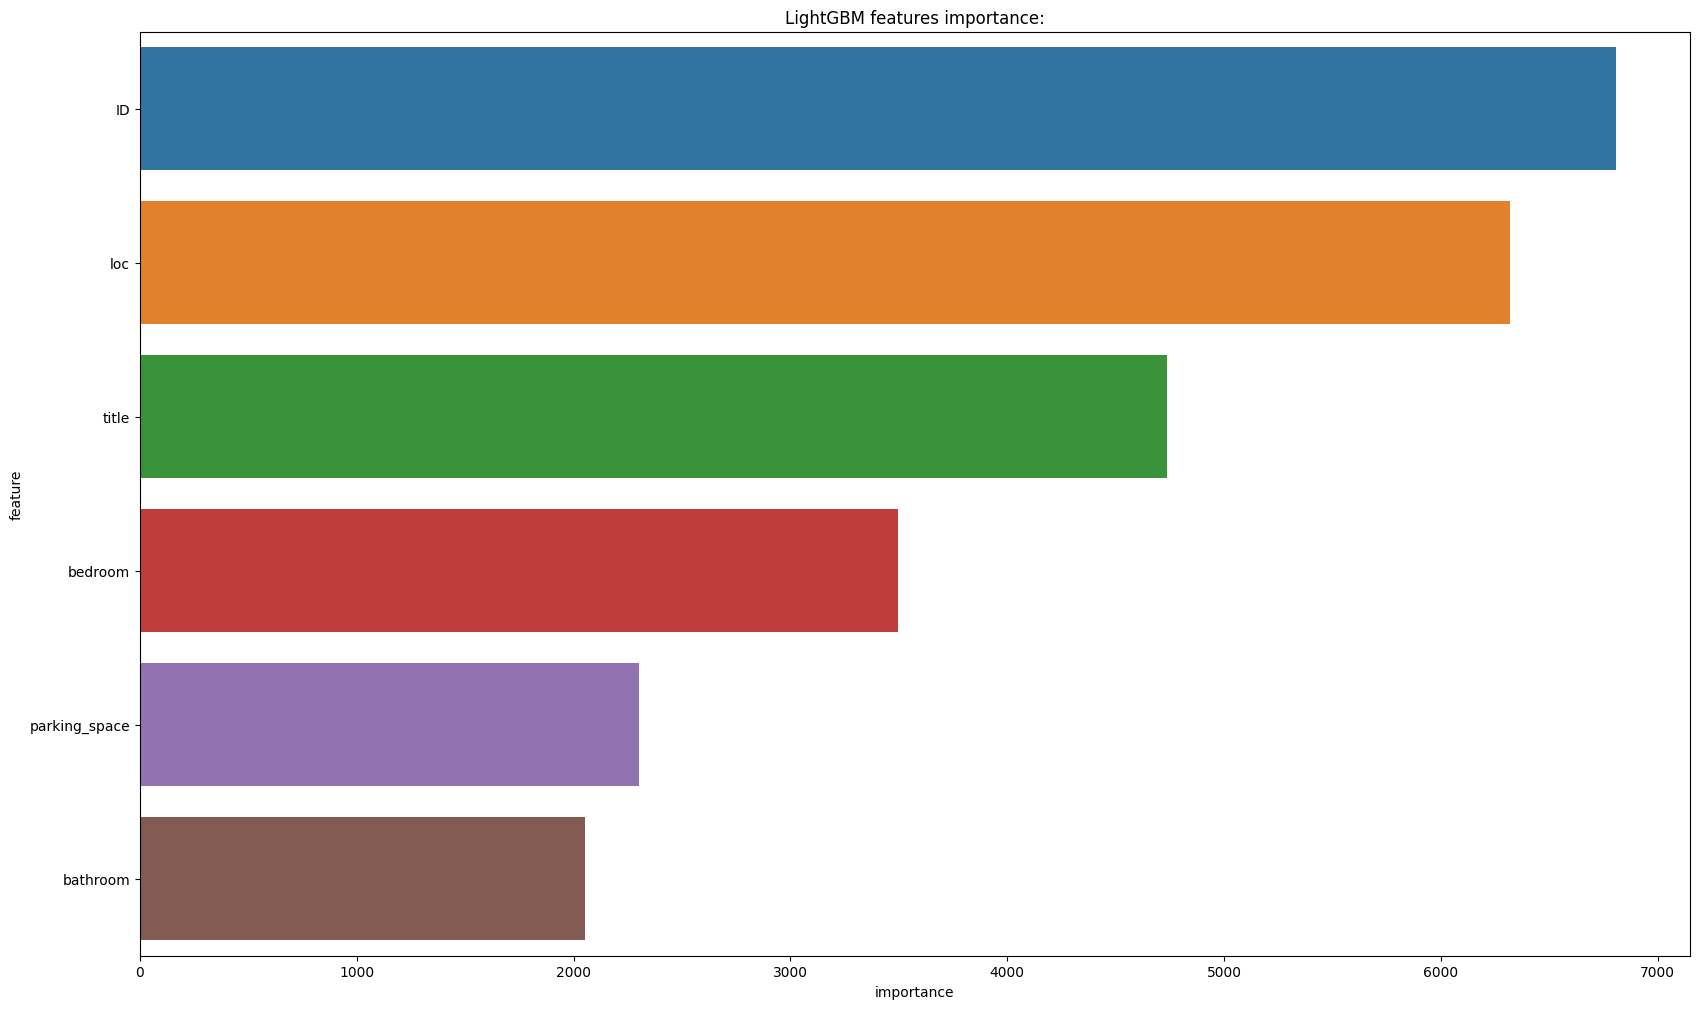

In [21]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data = feature_importance_df.sort_values(by = ['importance'], ascending = False))
plt.title('LightGBM Features importance:')

In [24]:
sub.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [25]:
sub['price'] =  np.mean(fold_pred, axis = 0)

In [26]:
sub.head()

,ID,price
0,845,2.311063e+06
1,1924,9.124555e+05
2,10718,1.138109e+06
3,12076,8.077316e+06
4,12254,1.920375e+06


In [27]:
sub.to_csv('base_submission_lgb.csv', index=False)

### CatboostRegressor

In [85]:
fold_pred_ctb=[]
oof_pred_ctb = []

params = {
    'iterations': 3000,
    'eta': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'RMSE',
    'random_seed': 42,
    'verbose': 100  # Set the number of iterations to display progress
}


fold_ctb = KFold(n_splits = 10, shuffle = True) #15#5#10
i=1
for train_index, test_index in fold_ctb.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model_ctb = CatBoostRegressor(**params, objective = "RMSE", use_best_model = True)
    model_ctb.fit(X_train, y_train,eval_set = [(X_train, y_train), (X_test, y_test)])

    preds= model_ctb.predict(X_test)
    print("err: ",(mean_squared_error(y_test, np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test, np.expm1(preds), squared=False))
    p2 = model_ctb.predict(test_df[X.columns])
    fold_pred.append(np.expm1(p2))


print(np.mean(oof_pred_ctb))

0:	learn: 0.4208432	test: 0.4208432	test1: 2387140.8077095	best: 2387140.8077095 (0)	total: 2.86ms	remaining: 8.59s
50:	learn: 0.2047281	test: 0.2047281	test1: 2387140.6913259	best: 2387140.6913088 (49)	total: 137ms	remaining: 7.9s
100:	learn: 0.1870056	test: 0.1870056	test1: 2387140.6790796	best: 2387140.6790796 (100)	total: 271ms	remaining: 7.78s
150:	learn: 0.1796617	test: 0.1796617	test1: 2387140.6760608	best: 2387140.6760399 (149)	total: 399ms	remaining: 7.53s
200:	learn: 0.1747986	test: 0.1747986	test1: 2387140.6750216	best: 2387140.6750215 (199)	total: 551ms	remaining: 7.68s
250:	learn: 0.1702953	test: 0.1702953	test1: 2387140.6739466	best: 2387140.6739466 (250)	total: 685ms	remaining: 7.5s
300:	learn: 0.1664834	test: 0.1664834	test1: 2387140.6734446	best: 2387140.6734446 (300)	total: 834ms	remaining: 7.48s
350:	learn: 0.1633884	test: 0.1633884	test1: 2387140.6729920	best: 2387140.6729339 (343)	total: 962ms	remaining: 7.26s
400:	learn: 0.1603864	test: 0.1603864	test1: 2387140.67

Text(0.5, 1.0, 'CatBoost Features importance:')

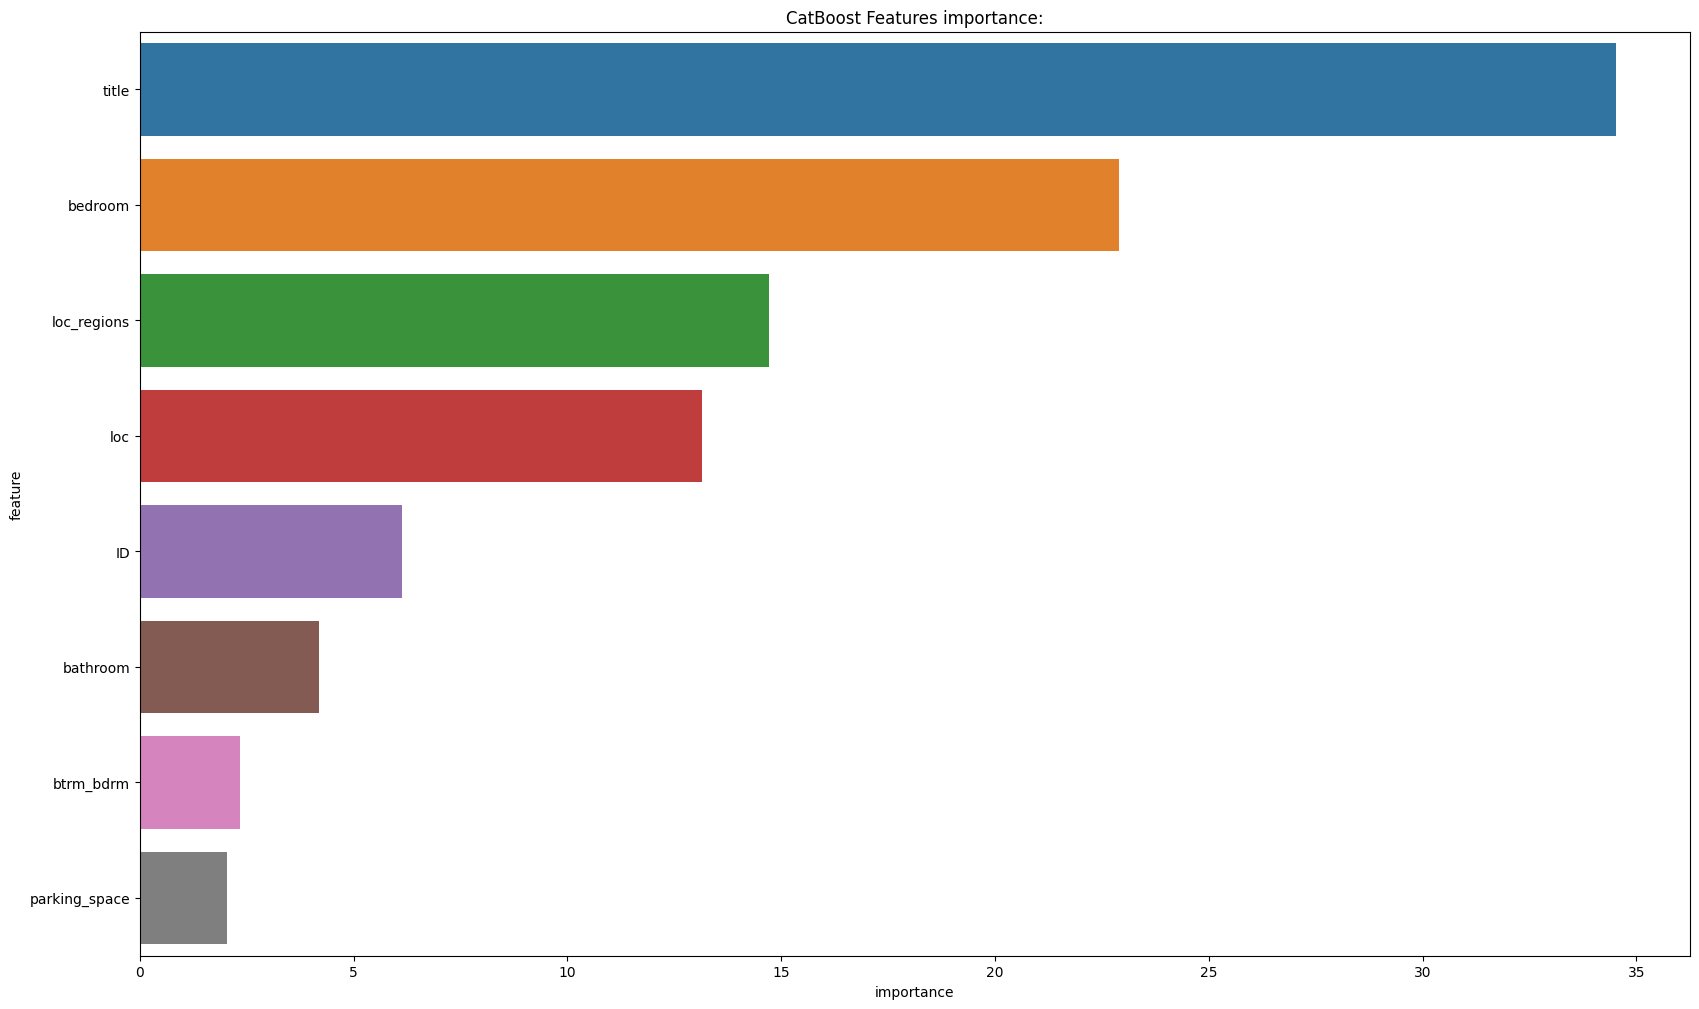

In [86]:
feature_importance_df = pd.DataFrame(model_ctb.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data = feature_importance_df.sort_values(by = ['importance'], ascending = False))
plt.title('CatBoost Features importance:')

In [89]:
sub.head()

,ID,price
0,845,NaN
1,1924,NaN
2,10718,NaN
3,12076,NaN
4,12254,NaN


In [90]:
sub['price'] =  np.mean(fold_pred_ctb, axis = 0)

In [91]:
sub['price'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: price, dtype: float64

In [88]:
sub.to_csv('sub2_ctb.csv', index=False)